## Notes

## Setup / data check

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pathlib import Path
%matplotlib inline

Loading the data

In [32]:
df = pd.read_csv(Path.cwd().parent.joinpath("input", "data4x_norm.csv"))
print(f"Number of rows = {df.shape[0]}, number of cols = {df.shape[1]}")
df.head()

Number of rows = 285, number of cols = 11


date         exp         imp       imae  crude_oil_brent  \
0  1999-01-01  528.559625  539.682000  52.197280        11.114500   
1  1999-02-01  572.454746  531.069894  48.747353        10.271579   
2  1999-03-01  585.525887  599.843900  50.386924        12.511304   
3  1999-04-01  628.716318  489.165203  47.016367        15.294500   
4  1999-05-01  554.241723  518.387293  48.617007        15.225263   

   gas_henry_hub  treasury3month  yuan_dollar_spot_tc  usdollar_euro  year  \
0       1.849474        4.335263             8.278921       1.159095  1999   
1       1.771053        4.438421             8.278137       1.120279  1999   
2       1.791739        4.440870             8.279152       1.088587  1999   
3       2.150000        4.289545             8.279186       1.070050  1999   
4       2.260000        4.498500             8.278535       1.063005  1999   

   month  
0      1  
1      2  
2      3  
3      4  
4      5

Profile of variables

In [33]:
df.loc[:285, :]

date          exp          imp        imae  crude_oil_brent  \
0    1999-01-01   528.559625   539.682000   52.197280        11.114500   
1    1999-02-01   572.454746   531.069894   48.747353        10.271579   
2    1999-03-01   585.525887   599.843900   50.386924        12.511304   
3    1999-04-01   628.716318   489.165203   47.016367        15.294500   
4    1999-05-01   554.241723   518.387293   48.617007        15.225263   
..          ...          ...          ...         ...              ...   
280  2022-05-01  1428.113760  1694.630314  110.021136       113.337619   
281  2022-06-01  1363.141884  1767.376705  110.299335       122.710952   
282  2022-07-01  1294.293181  1789.115105  108.781981       111.925714   
283  2022-08-01          NaN          NaN         NaN       100.446364   
284  2022-09-01          NaN          NaN         NaN        91.366250   

     gas_henry_hub  treasury3month  yuan_dollar_spot_tc  usdollar_euro  year  \
0         1.849474        4.335263             8.278921       1.159095  1999   
1         1.771053        4.438421             8.278137       1.120279  1999   
2         1.791739        4.440870             8.279152       1.088587  1999   
3         2.150000        4.289545             8.279186       1.070050  1999   
4         2.260000        4.498500             8.278535       1.063005  1999   
..             ...             ...                  ...            ...   ...   
280       8.144762        0.983333             6.698957       1.056719  2022   
281       7.703333        1.494762             6.695190       1.056719  2022   
282       7.284500        2.232500             6.735155       1.016825  2022   
283       8.805652        2.630870             6.800678       1.012878  2022   
284       8.558750        2.987500             6.933917       0.997300  2022   

     month  
0        1  
1        2  
2        3  
3        4  
4        5  
..     ...  
280      5  
281      6  
282      7  
283      8  
284      9  

[285 rows x 11 columns]

Removing last two rows

In [34]:
df = df.loc[:282, :]
df.tail()

date          exp          imp        imae  crude_oil_brent  \
278  2022-03-01  1532.336765  2046.676435  118.039734       117.245217   
279  2022-04-01  1160.754061  1497.910195  107.455564       104.575263   
280  2022-05-01  1428.113760  1694.630314  110.021136       113.337619   
281  2022-06-01  1363.141884  1767.376705  110.299335       122.710952   
282  2022-07-01  1294.293181  1789.115105  108.781981       111.925714   

     gas_henry_hub  treasury3month  yuan_dollar_spot_tc  usdollar_euro  year  \
278       4.898261        0.443478             6.344552       1.101852  2022   
279       6.596000        0.763000             6.431000       1.080295  2022   
280       8.144762        0.983333             6.698957       1.056719  2022   
281       7.703333        1.494762             6.695190       1.056719  2022   
282       7.284500        2.232500             6.735155       1.016825  2022   

     month  
278      3  
279      4  
280      5  
281      6  
282      7

split data into train/validation/test. This a time series panel, so we should use a sequence split

In [35]:
train = 0.70
validation = 0.15
test = 0.15

In [36]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=2, max_train_size=train*df.shape[0])
X = df.drop(["date", "exp"], axis=1)
y = df.loc[:, "exp"]

In [37]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index], X.loc[test_index]
    y_train, y_test = y.iloc[train_index], y.loc[test_index]

In [38]:
X_train.tail()

imp       imae  crude_oil_brent  gas_henry_hub  treasury3month  \
184  1372.226523  86.036981       109.539091       4.581905        0.032381   
185  1197.189889  85.360730       111.795238       4.587619        0.035714   
186  1256.756453  86.628677       106.768182       4.050909        0.026364   
187  1317.405927  86.174433       101.608095       3.912381        0.032857   
188  1304.498372  88.135780        97.091429       3.923810        0.020000   

     yuan_dollar_spot_tc  usdollar_euro  year  month  
184             6.237957       1.373852  2014      5  
185             6.230605       1.359486  2014      6  
186             6.198436       1.353336  2014      7  
187             6.154129       1.331524  2014      8  
188             6.138229       1.288910  2014      9

In [39]:
X_test.head()

imp       imae  crude_oil_brent  gas_henry_hub  treasury3month  \
189  1340.394752  92.546565        87.425217       3.781739        0.016818   
190  1277.510524  93.999684        79.437895       4.122632        0.021667   
191  1258.960825  95.226275        62.335000       3.481818        0.029091   
192  1142.030737  88.298983        47.759500       2.994500        0.027500   
193  1137.192892  90.035337        58.095500       2.874737        0.017895   

     yuan_dollar_spot_tc  usdollar_euro  year  month  
189             6.125050       1.267732  2014     10  
190             6.124894       1.247250  2014     11  
191             6.188629       1.232919  2014     12  
192             6.218135       1.161490  2015      1  
193             6.251847       1.135026  2015      2

Splitting test into validation/test

In [40]:
vss = TimeSeriesSplit(n_splits= 2, max_train_size= int(np.ceil(0.5 * X_test.shape[0])))
X_test = X_test.reset_index()
y_test = y_test.reset_index()
for train_index1, test_index1 in vss.split(X_test):
    X_vali, X_test2 = X_test.iloc[train_index1], X_test.loc[test_index1]
    y_vali, y_test2 = y_test.iloc[train_index1], y_test.loc[test_index1]

In [41]:
X_vali = X_vali.drop("index", axis = 1)
X_test2 = X_test2.drop("index", axis = 1)
y_vali = y_vali.drop("index", axis = 1)
y_test2 = y_test2.drop("index", axis = 1)

In [42]:
profile = ProfileReport(X_train, title="X variables", dark_mode=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model/testing

Loading some libraries

In [43]:
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

Creating a fun for error plot

In [58]:
def plot_learning_curve(model,
                        xtrain, ytrain,
                        train_sizes_param=np.linspace(0.01, 1.0, 40),
                        cv_param=5
                        ):
    train_sizes, train_scores, valid_scores = learning_curve(
    model, xtrain, ytrain, train_sizes=train_sizes_param, cv=cv_param,
    scoring="neg_root_mean_squared_error")
    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)
    fig = plt.figure()
    plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
    plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
    plt.legend(loc="upper left")
    plt.axis('on')
    plt.close()
    return fig

models

In [60]:
pipelines = {
    'ls' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=4, include_bias=False), Lasso()),
    'rd' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=4, include_bias=False), Ridge()),
    'en' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=4, include_bias=False), ElasticNet()),
    'rf' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=4, include_bias=False), RandomForestRegressor()),
    'gb' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=4, include_bias=False), GradientBoostingRegressor())
}

grid

In [69]:
grid = {
    'ls' : {'lasso__alpha' : [0.1, 0.5, 0.6]},
    'rd' : {'ridge__alpha' : [0.1, 0.5, 0.6]},
    'en' : {'elasticnet__alpha' : [0.1, 0.5], 'elasticnet__l1_ratio': [0.8, 0.9, 1], 'elasticnet__max_iter' : [2000]},
    'rf' : {'randomforestregressor__n_estimators': [180, 200, 250]},
    'gb' : {'gradientboostingregressor__n_estimators': [180, 200, 250]}
}

running models

In [70]:
fit_models = {}
for k, v in pipelines.items():
    print(f"Runnning model: {k}")
    model = GridSearchCV(v, grid[k], n_jobs=-1, cv=10)
    fit_models[k] = model.fit(X_train, y_train)

Runnning model: ls
Runnning model: rd
Runnning model: en
Runnning model: rf
Runnning model: gb


Viewing the best model

In [71]:
def model_check(modelname, model, roundn = 1):
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_vali)
    mse_train = mean_squared_error(y_train, yhat_train)
    mse_test = mean_squared_error(y_vali, yhat_test)
    rmse_train = np.round(np.sqrt(mse_train), roundn)
    rmse_test = np.round(np.sqrt(mse_test), roundn)
    print(f"the model {modelname} has an rmse for train dataset: {rmse_train}, for the valid test is: {rmse_test}" )

Check values

In [72]:
for k, v in fit_models.items():
    model_check(k, v, 1)

the model ls has an rmse for train dataset: 17.9, for the valid test is: 428.9
the model rd has an rmse for train dataset: 7.4, for the valid test is: 573.0
the model en has an rmse for train dataset: 17.2, for the valid test is: 425.3
the model rf has an rmse for train dataset: 16.5, for the valid test is: 269.6
the model gb has an rmse for train dataset: 0.7, for the valid test is: 237.5


In [73]:
fit_models["rf"].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=180))])

Creating the error curve for the best model

c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.947e+00, tolerance: 1.484e+00
  model = cd_fast.enet_coordinate_descent(
c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

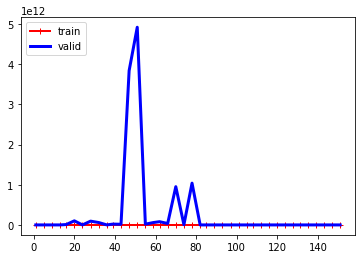

In [74]:
plot_learning_curve(fit_models["en"].best_estimator_, X_train, y_train)

We select the two best model an create an hyper parameter grid

In [94]:
pipelines2 = {
    'rf' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=1, include_bias=False), RandomForestRegressor()),
    'gb' : make_pipeline(StandardScaler(), PolynomialFeatures(degree=1, include_bias=False), GradientBoostingRegressor())
}
grid2 = {
    'rf' : {'randomforestregressor__n_estimators': [180, 200, 250, 300],
            'randomforestregressor__max_depth': [3, 4, 5, 6, 7],
            'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']},
    'gb' : {'gradientboostingregressor__n_estimators': [180, 200, 250, 300],
            'gradientboostingregressor__max_depth' : [3, 4, 5, 6, 7],
            'gradientboostingregressor__max_features': ['auto', 'sqrt', 'log2']}
}

In [95]:
fit_models2 = {}
for k, v in pipelines2.items():
    print(f"Runnning model: {k}")
    model = GridSearchCV(v, grid2[k], n_jobs=-1, cv=10)
    fit_models2[k] = model.fit(X_train, y_train)

Runnning model: rf


c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Runnning model: gb


c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Documentos\proyectos\xm4ecast\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

In [96]:
for k, v in fit_models2.items():
    model_check(k, v, 1)

the model rf has an rmse for train dataset: 17.0, for the valid test is: 231.0
the model gb has an rmse for train dataset: 5.2, for the valid test is: 208.7


In [97]:
fit_models2['gb'].best_params_

{'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 'auto',
 'gradientboostingregressor__n_estimators': 180}

In [98]:
yhat = fit_models2['gb'].predict(X_test2)
np.sqrt(mean_squared_error(y_test2, yhat))

419.57858463976294